<a href="https://colab.research.google.com/github/ishitananda3/Data-analysis-Data-science/blob/main/Booking_data_analyst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Load the dataset**

In [ ]:
import numpy as np
import pandas as pd

df=pd.read_excel("DataAnalyst_Assesment_Dataset.xlsx")

**Step 2: Initial data inspection**

In [ ]:
# display first 5 rows
print(df.head())

                             Booking ID                           Customer ID  \
0  279d92c6-ce26-47c0-8915-e45b77fe20e2  00901ce3-3d86-4c97-bca2-40ccac2fb99f   
1  415bfcbe-1a2e-4d4b-809a-4c5b606653b1  b82db986-bd52-4b07-bdd8-aa8cf2016241   
2  2100024b-46fc-47b5-ac1c-047d007a4723  6bbb6e83-9577-4f64-80b0-f073132d18f3   
3  74936def-088f-4d34-bad1-dfa76f78b704  f16f5beb-6a7d-4493-a19e-a30dbbd206e9   
4  6272b4e7-a508-4ed7-bae0-21f7293287a8  eb297435-93d1-4e65-8dd4-6450922305cb   

  Customer Name    Booking Type Booking Date     Status Class Type Instructor  \
0    Customer 1        Facility   2025-05-30    Pending        NaN        NaN   
1    Customer 2  Birthday Party   2025-05-29    Pending        NaN        NaN   
2    Customer 3  Birthday Party   2025-05-09  Confirmed        NaN        NaN   
3    Customer 4  Birthday Party   2025-06-07    Pending        NaN        NaN   
4    Customer 5           Class   2025-04-13    Pending        Art        NaN   

  Time Slot  Duration (min

In [ ]:
# check col names and datatype
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Booking ID         1000 non-null   object        
 1   Customer ID        1000 non-null   object        
 2   Customer Name      1000 non-null   object        
 3   Booking Type       1000 non-null   object        
 4   Booking Date       1000 non-null   datetime64[ns]
 5   Status             1000 non-null   object        
 6   Class Type         328 non-null    object        
 7   Instructor         270 non-null    object        
 8   Time Slot          795 non-null    object        
 9   Duration (mins)    795 non-null    float64       
 10  Price              1000 non-null   float64       
 11  Facility           672 non-null    object        
 12  Theme              273 non-null    object        
 13  Subscription Type  0 non-null      float64       
 14  Service N

In [ ]:
# summary of numeric cols
print(df.describe())

                        Booking Date  Duration (mins)        Price  \
count                           1000       795.000000  1000.000000   
mean   2025-05-07 17:08:09.600000256        84.415094   139.477210   
min              2025-03-25 00:00:00        45.000000     0.000000   
25%              2025-04-14 00:00:00        45.000000    58.090000   
50%              2025-05-08 00:00:00        90.000000   137.355000   
75%              2025-05-31 00:00:00       120.000000   219.897500   
max              2025-06-22 00:00:00       120.000000   299.760000   
std                              NaN        30.383838    92.239835   

       Subscription Type  
count                0.0  
mean                 NaN  
min                  NaN  
25%                  NaN  
50%                  NaN  
75%                  NaN  
max                  NaN  
std                  NaN  


In [ ]:
# check the missing values
print(df.isnull().sum())

Booking ID              0
Customer ID             0
Customer Name           0
Booking Type            0
Booking Date            0
Status                  0
Class Type            672
Instructor            730
Time Slot             205
Duration (mins)       205
Price                   0
Facility              328
Theme                 727
Subscription Type    1000
Service Name            0
Service Type            0
Customer Email         94
Customer Phone        105
dtype: int64


**Step 3: Handle missing values**

In [ ]:
# Fill 'Duration (mins)' with median
df["Duration (mins)"] = df["Duration (mins)"].fillna(df["Duration (mins)"].median())
print(df['Duration (mins)'])

0       90.0
1       90.0
2      120.0
3       90.0
4      120.0
       ...  
995     90.0
996     90.0
997    120.0
998    120.0
999    120.0
Name: Duration (mins), Length: 1000, dtype: float64


In [ ]:
# handle missing values for categorical cols
# for 'Class Type' if no type mentioned, we can use 'Not specified'
df["Class Type"] = df["Class Type"].fillna("Not specified")
print(df['Class Type'])

0      Not specified
1      Not specified
2      Not specified
3      Not specified
4                Art
           ...      
995    Not specified
996              Art
997    Not specified
998    Not specified
999    Not specified
Name: Class Type, Length: 1000, dtype: object


In [ ]:
# for 'Instructor', if nonoe is mentioned, we can use "Unknown"
df["Instructor"]=df['Instructor'].fillna('Unknown')
print(df['Instructor'])

0           Unknown
1           Unknown
2           Unknown
3           Unknown
4           Unknown
           ...     
995         Unknown
996    James Howard
997         Unknown
998         Unknown
999         Unknown
Name: Instructor, Length: 1000, dtype: object


In [ ]:
# similarly, for 'facility', we can use 'other'
df["Facility"]=df['Facility'].fillna('other')
print(df['Facility'])

# for 'Theme', we can use "None"
df["Theme"]=df['Theme'].fillna('None')
print(df['Theme'])

# for "subscription type", drop the col since all values are missing
df.drop("Subscription Type", axis=1, inplace=True)

0      Party Room
1      Party Room
2       Play Area
3       Play Area
4           other
          ...    
995    Party Room
996         other
997    Party Room
998    Party Room
999     Play Area
Name: Facility, Length: 1000, dtype: object
0           None
1      Superhero
2           None
3           None
4           None
         ...    
995     Princess
996         None
997         None
998         None
999         None
Name: Theme, Length: 1000, dtype: object


In [ ]:
print(df.isnull().sum())

Booking ID           0
Customer ID          0
Customer Name        0
Booking Type         0
Booking Date         0
Status               0
Class Type           0
Instructor           0
Time Slot          205
Duration (mins)      0
Price                0
Facility             0
Theme                0
Service Name         0
Service Type         0
Customer Email      94
Customer Phone     105
dtype: int64


In [ ]:
# for timeslot, we can use 'Not recorded'
df["Time Slot"]=df['Time Slot'].fillna('Not recorded')
print(df['Time Slot'])

# For Customer Email, we use "No Email"
df["Customer Email"]=df['Customer Email'].fillna('No Email')
print(df['Customer Email'])

# for customer phone, we use "Bo Phone"
df["Customer Phone"]=df['Customer Phone'].fillna('No Phone')
print(df['Customer Phone'])

0          10:00:00
1      Not recorded
2          11:00:00
3          12:00:00
4          15:00:00
           ...     
995    Not recorded
996    Not recorded
997        17:00:00
998        12:00:00
999        16:00:00
Name: Time Slot, Length: 1000, dtype: object
0         customer1@example.com
1         customer2@example.com
2         customer3@example.com
3         customer4@example.com
4         customer5@example.com
                 ...           
995     customer996@example.com
996     customer997@example.com
997     customer998@example.com
998     customer999@example.com
999    customer1000@example.com
Name: Customer Email, Length: 1000, dtype: object
0      001-730-9034
1      001-537-5668
2      001-880-7769
3      001-491-3107
4      001-718-3794
           ...     
995    001-522-8955
996        No Phone
997    001-391-4565
998    001-668-6307
999    001-226-7265
Name: Customer Phone, Length: 1000, dtype: object


In [ ]:
print(df.isnull().sum())

Booking ID         0
Customer ID        0
Customer Name      0
Booking Type       0
Booking Date       0
Status             0
Class Type         0
Instructor         0
Time Slot          0
Duration (mins)    0
Price              0
Facility           0
Theme              0
Service Name       0
Service Type       0
Customer Email     0
Customer Phone     0
dtype: int64


**Step 4: Feature Engineering**

In [ ]:
# add derived columns for deeper analysis
df["Booking Month"]= df['Booking Date'].dt.month
df["Booking Day"]= df['Booking Date'].dt.day
df["Booking Year"]= df['Booking Date'].dt.year
print(df['Booking Month'])

0      5
1      5
2      5
3      6
4      4
      ..
995    5
996    5
997    4
998    5
999    5
Name: Booking Month, Length: 1000, dtype: int32


In [ ]:
# categorize prices into tiers like low, medium, high
df['Price Tier']=pd.cut(df['Price'], bins=[0,50,150,np.inf], labels=['Low', 'Medium', 'High'])
print(df['Price Tier'])

0         Low
1        High
2        High
3        High
4        High
        ...  
995    Medium
996    Medium
997      High
998      High
999    Medium
Name: Price Tier, Length: 1000, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']


**Step 5: exploratory Data Analysis (EDA)**

In [ ]:
# total revenue
total_revenue=df['Price'].sum()
print(f"Total Revenue: ${total_revenue:,.2f}")
print()

# revenue by booking type
revenue_by_type=df.groupby('Booking Type')['Price'].sum()
print(revenue_by_type)

Total Revenue: $139,477.21

Booking Type
Birthday Party    45141.66
Class             45566.38
Facility          48769.17
Name: Price, dtype: float64


In [ ]:
# avg booking duration
avg_duration=df['Duration (mins)'].mean()
print(f"Average Booking Duration: {avg_duration:.2f} minutes")
print()

# count of bookings by status
booking_status=df['Status'].value_counts()
print(booking_status)

Average Booking Duration: 85.56 minutes

Status
Pending      510
Confirmed    490
Name: count, dtype: int64


Booking Month
3    11550.86
4    46692.01
5    45389.75
6    35844.59
Name: Price, dtype: float64


<Axes: title={'center': 'Monthly Revenue'}, xlabel='Booking Month'>

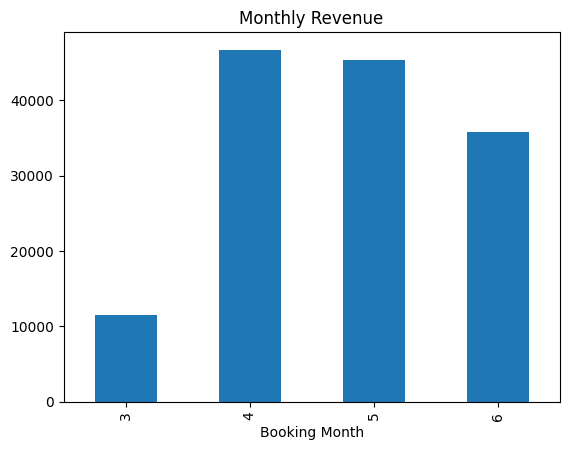

In [ ]:
# monthly revenue trends
monthly_revenue=df.groupby('Booking Month')['Price'].sum()
print(monthly_revenue)
monthly_revenue.plot(kind="bar", title="Monthly Revenue")

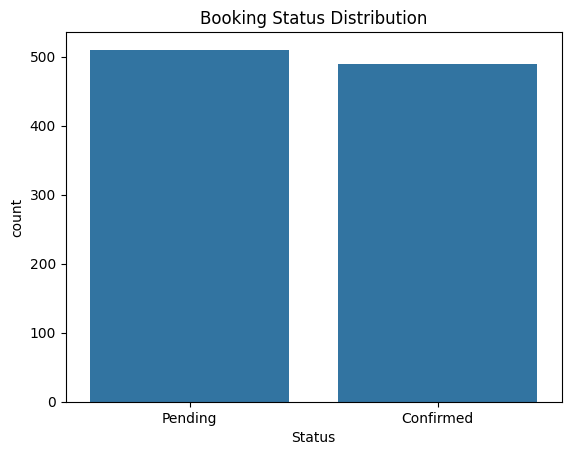

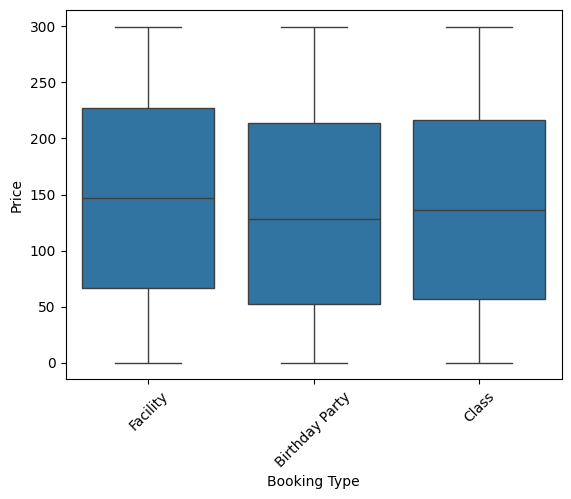

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot booking status distribution
sns.countplot(data=df, x="Status")
plt.title("Booking Status Distribution")
plt.show()

# Boxplot of price by booking type
sns.boxplot(data=df, x="Booking Type", y="Price")
plt.xticks(rotation=45)
plt.show()

**Step 6: Advanced Analysis**

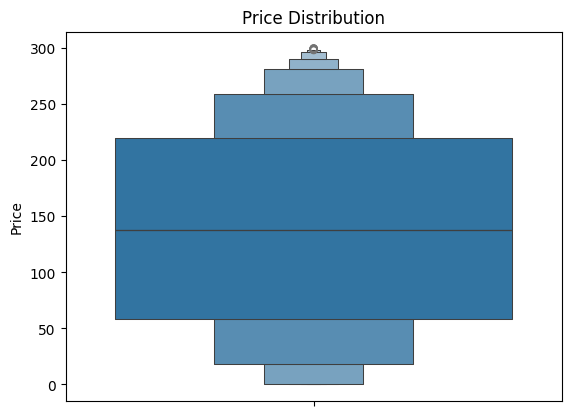

In [ ]:
# outlier detection for price
sns.boxenplot(data=df, y="Price")
plt.title("Price Distribution")
plt.show()

In [ ]:
# top customers by spending
top_customers = df.groupby("Customer Name")["Price"].sum().nlargest(10)
print(top_customers)

Customer Name
Customer 73     299.76
Customer 709    299.62
Customer 521    299.29
Customer 324    299.14
Customer 51     299.05
Customer 382    298.75
Customer 28     298.54
Customer 528    298.15
Customer 84     298.04
Customer 626    297.45
Name: Price, dtype: float64


**Step 7 : Export cleaned data for interactive dashboard**

In [ ]:
df.to_csv("cleaned_bookings_data.csv", index=False)

Some key questions that we can explore based on the dataset

In [ ]:
# which booking type generate the most revenue
revenue_by_type=df.groupby("Booking Type")['Price'].sum()
print(revenue_by_type)

Booking Type
Birthday Party    45141.66
Class             45566.38
Facility          48769.17
Name: Price, dtype: float64


In [ ]:
# do certain themes attract more customers?
theme_counts = df[df['Theme'] != 'None']['Theme'].value_counts() # excluding none
theme_avg_price = df[df['Theme'] != 'None'].groupby('Theme')['Price'].mean().sort_values(ascending=False)


print("\nTop Themes by Bookings")
print(theme_counts.head(5).to_string())

print("\nTop Themes by Average Price")
print(theme_avg_price.head(3).to_string())


Top Themes by Bookings
Theme
Superhero    94
Sports       93
Princess     86

Top Themes by Average Price
Theme
Princess     146.935233
Superhero    136.112340
Sports       129.669892
